In [1]:
#first load the libraries my dear
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [5]:
#then pull the stock data of Wells Fargo 
df = web.DataReader('WFC', data_source='yahoo', start='2012-01-01', end='2019-12-17') 
#let's see what we have here
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,28.520000,27.940001,27.940001,28.430000,40071200.0,21.747992
2012-01-04,28.690001,28.040001,28.340000,28.559999,27519200.0,21.847435
2012-01-05,29.580000,28.250000,28.500000,29.020000,48435100.0,22.199324
2012-01-06,29.080000,28.459999,28.840000,28.940001,32303500.0,22.138124
2012-01-09,29.379999,29.000000,29.150000,29.299999,25720100.0,22.413504
2012-01-10,29.799999,29.180000,29.740000,29.410000,29860100.0,22.497660
2012-01-11,29.680000,29.080000,29.250000,29.620001,30908700.0,22.658302
2012-01-12,29.940001,29.240000,29.770000,29.610001,29175900.0,22.650648
2012-01-13,29.639999,28.850000,28.900000,29.610001,43051100.0,22.650648


C:\Users\dogud\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


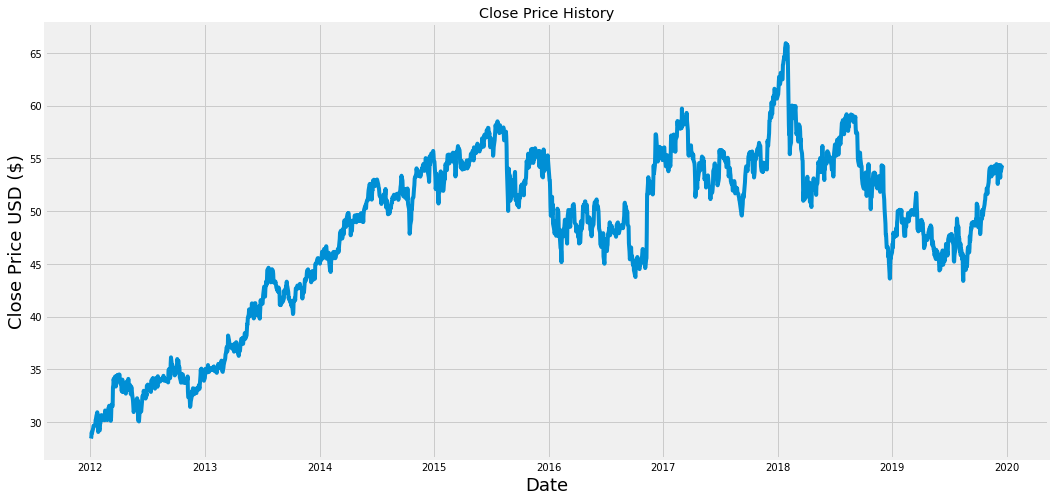

In [6]:
#understood nothing presumably
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()
#that's much better

In [7]:
#we only need the 'close' column so take only that
data = df.filter(['Close'])
#then turn this into an array
dataset = data.values
#we will use 80% of this data as our train set
training_data_len = math.ceil( len(dataset) *.8) 

In [8]:
#let's scale it a little, they usually do that
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [9]:
#construct the training 
train_data = scaled_data[0:training_data_len  , : ]
#then we should divide this into x and y
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [10]:
#omg enough already, turn these into numpy arrays again
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
#LSTM only lets reshaped data in, so...
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [12]:
#THAT'S HOW YOU CONSTRUCT AN LSTM MODEL
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [13]:
#Compile it with adam optimizer and mean squared error
model.compile(optimizer='adam', loss='mean_squared_error')

In [14]:
#OO YEAH, TRAIN
model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
1543/1543 [==============================] - 45s 29ms/step - loss: 0.0026


In [15]:
#Construct the test
test_data = scaled_data[training_data_len - 60: , : ]
#Guess what
x_test = []
y_test =  dataset[training_data_len : , : ] #We will do it in a way that divides the data in this proportion .8/.2 
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [16]:
#numpy array the x_test 
x_test = np.array(x_test)

In [17]:
#reshape again 
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [18]:
#predictions are comming
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)

In [19]:
#rmse means root mean squared error, the closer this value to 0, the better. 
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

1.081269028796182

C:\Users\dogud\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


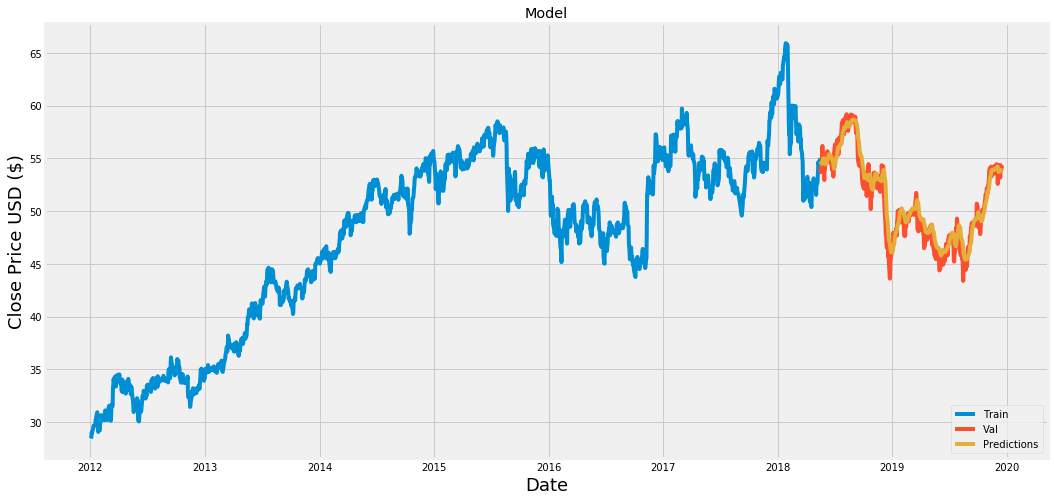

In [20]:
#let's make it a plot because our monkey brains need to see a shape
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize it 
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [21]:
#english version of this graph is below
valid

,Close,Predictions
Date,,
2018-05-17,54.220001,54.436947
2018-05-18,53.700001,54.532227
2018-05-21,54.540001,54.479305
2018-05-22,55.259998,54.483688
2018-05-23,56.180000,54.603310
2018-05-24,54.669998,54.879196
2018-05-25,54.900002,54.975170
2018-05-29,52.950001,55.022320
2018-05-30,54.230000,54.772102


In [32]:
#now let's check the December 18th close value. The machine does not have this info, so let's see how successful you are, machine.
wellsfargo_quote = web.DataReader('WFC', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#construct a dataframe
new_df = wellsfargo_quote.filter(['Close'])
#let's look at the last 60 days' values
last_60_days = new_df[-60:].values
#we will scale data in between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#empty list
X_test = []
#we will append the last 60 days
X_test.append(last_60_days_scaled)
#numpy array again
X_test = np.array(X_test)
#reshape again
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#OKAY LET'S SEE WHAT THE MACHINE PREDICTED
pred_price = model.predict(X_test)
#AND UNDO THE SCALING 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[54.128735]]


In [24]:
#WOW, THE MACHINE GOT VERY CLOSE
#GOOD FOR YOU MACHINE
#SEE YOU
fargo_quote2 = web.DataReader('WFC', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(fargo_quote2['Close'])

Date
2019-12-18    53.669998
Name: Close, dtype: float64
